<h1 align=center><font size = 5>Clustering Earthquakes in Turkey with DBSCAN</font></h1>

<h4 align=center>From 6th February to 27th April</h4>

<br>

<img src="https://pbs.twimg.com/media/Fo2gx2kX0AItpFs?format=jpg&name=large" width=1000 height=500 alt="https://github.com/doguilmak/Clustering-Earthquakes-in-Turkey">

<small>Picture Source: <a href="https://www.esa.int/ESA_Multimedia/Images/2023/02/Horizontal_offsets_from_Sentinel-2">European Space Agency</a>

<br>

<h2>Keywords</h2>
<ul>
  <li>Geology</li>
  <li>Earth Science</li>
  <li>Earthquake</li>
  <li>Turkey</li>
  <li>DBSCAN</li>
</ul>

<br>

<h2>Definition of Earthquake</h2>

<p>An earthquake is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's <i>lithosphere</i> that creates <i>seismic waves</i>. People can scale <i>seismic waves</i> as <i>The Richter scale</i>.</p>

<br>

<h2>Definition of the Richter Scale</h2>

<p>The Richter scale —also called the Richter magnitude scale, Richter's magnitude scale, and the <i>Gutenberg–Richter</i> scale—is a measure of the strength of earthquakes, developed by <i>Charles Francis Richter</i> and presented in his landmark <i>1935</i> paper, where he called it the "magnitude scale".This was later revised and renamed the local magnitude scale, denoted as $ML$ or $M_{L}$.</p>

<br>

$$M_{L} = log_{10} A - log_{10} A_{0}(δ) = log_{10} [A/A_{0}(δ)]$$

<br>

<p>$A$ is the maximum excursion of the Wood–Anderson seismograph</p>

<p>The empirical function $A_{0}$ depends only on the epicentral distance of the station, $δ$. In practice, readings from all observing stations are averaged after adjustment with station-specific corrections to obtain the $M_{L}$ value.</p>

<br>

<h2>AFAD Event Catalog</h2>

<p>The AFAD Event Catalog is a database of earthquakes that have occurred in and around Turkey. AFAD stands for the Disaster and Emergency Management Presidency of Turkey (in Turkish: Afet ve Acil Durum Yönetimi Başkanlığı), which is responsible for managing <i>disaster</i> and <i>emergency situations</i> in the country.

The AFAD Event Catalog provides information about <i>earthquakes</i> that have occurred in Turkey, as well as earthquakes in neighboring countries that have been felt in Turkey. The catalog includes data on the location, magnitude, depth, and time of the <i>earthquakes</i>, as well as other details such as the number of <i>casualties</i> and the extent of damage.

The AFAD Event Catalog is an important tool for <i>earthquake</i> research and preparedness in Turkey, as it allows scientists and emergency managers to better understand the patterns and characteristics of <i>earthquakes</i> in the region. It is also a valuable resource for the public, as it provides up-to-date information about earthquakes that can help people stay informed and take appropriate safety measures.</p>

<br>

<h3>Data Link</h3>

You can take a look at original website of <a href='https://deprem.afad.gov.tr/event-catalog'>AFAD Event Catalog.</a>

<br>

<h2>License</h2>

<p>MIT License</p>

<br>

<h3>Sources</h3>
<ul>
    <li><a href="https://en.wikipedia.org/wiki/Richter_magnitude_scale">Wikipedia</a></li>
    <li><a href="https://deprem.afad.gov.tr/event-catalog">AFAD Event Catalog</a></li>
</ul>

<br>

<h2>Table of Contents</h2>

<p>The <i>magnitude</i> of the <i>earthquakes</i> has been visualized on the plot and clustered by <i>DBSCAN</i> in Turkey.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries for Model</a></li>
<li><a href="https://#data_preparation">Dataset Preparation (Data Preprocessing)</a></li>
<li><a href="https://#dbscan">Clustering with DBSCAN</a></li>

<br>

<p>Estimated Time Needed: <strong>20 min</strong></p>

</div>

<br>
<h2 align=center id="import">Import Libraries for Model</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [1]:
!pip3 install basemap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.6 MB/s eta 0:00:00


In [2]:
!pip3 install basemap-data-hires -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 9.7 MB/s eta 0:00:00


In [3]:
!pip3 install matplotlib -q

In [4]:
from datetime import date
from datetime import timedelta
import datetime

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN 
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [5]:
# Commented out IPython magic to ensure Python compatibility.
from mpl_toolkits.basemap import Basemap

import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.7.1'

In [6]:
%cd /content/

/content


In [7]:
%ls

data.csv  sample_data/


<br>
<h2 align=center id="data_preparation">Dataset Preparation (Data Preprocessing)</h2>


<p>You should do following steps for the dataset. First, you need to <a href='https://deprem.afad.gov.tr/event-catalog'>AFAD Event Catalog</a> website in you want to dowload your own dataset. After that, you should select date range (Tarih Aralığı(UTC)). In addition, you can do more specific studies by entering parameters such as latitude range, longitude range, depth range, size range and location.</p>

<br>

<img src="https://raw.githubusercontent.com/doguilmak/Clustering-Earthquakes-in-Turkey/main/assets/AFAD_event_catalog_step_1.png" width=1000 height=500 alt="https://github.com/doguilmak/Clustering-Earthquakes-in-Turkey">

<br>

<p>Then, you shold click on Filtrele button indicated by the blue arrow. After that, you can see all the earthquakes happened in spesific date range. Now, we can download the data. For that, all we need to do is click on CSV button on the bottom.</p>

<br>

<p>Loading dataset.</p>

In [8]:
path = '/content/data.csv'

In [9]:
df = pd.read_csv(path)

In [10]:
df.head()

Date  Longitude  Latitude  Depth   Rms Type  Magnitude  \
0  2023-04-27T07:19:18     36.413    38.205   9.02  0.54   ML        2.2   
1  2023-04-27T07:17:40     36.492    37.911   7.00  0.28   ML        1.7   
2  2023-04-27T06:55:04     36.344    37.971   7.00  0.46   ML        1.7   
3  2023-04-27T06:49:01     38.213    38.276   7.00  0.10   ML        1.6   
4  2023-04-27T06:47:10     38.302    38.281   8.28  0.23   ML        1.3   

                 Location  EventID  
0  Göksun (Kahramanmaraş)   579066  
1  Göksun (Kahramanmaraş)   579067  
2  Göksun (Kahramanmaraş)   579057  
3     Yeşilyurt (Malatya)   579059  
4    Battalgazi (Malatya)   579058

<p>We can modify our <i>Date</i> column. We can separate the time and date values ​​as separate columns. After that, we don't need <i>Date</i> column anymore.</p>

In [11]:
df[['Dates', 'Time']] = df['Date'].str.split('T', 1, expand=True)
df.drop(columns=['Date'], inplace=True)

<ipython-input-11-37e3a0fe4bb4>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Dates', 'Time']] = df['Date'].str.split('T', 1, expand=True)


In [12]:
df.head()

Longitude  Latitude  Depth   Rms Type  Magnitude                Location  \
0     36.413    38.205   9.02  0.54   ML        2.2  Göksun (Kahramanmaraş)   
1     36.492    37.911   7.00  0.28   ML        1.7  Göksun (Kahramanmaraş)   
2     36.344    37.971   7.00  0.46   ML        1.7  Göksun (Kahramanmaraş)   
3     38.213    38.276   7.00  0.10   ML        1.6     Yeşilyurt (Malatya)   
4     38.302    38.281   8.28  0.23   ML        1.3    Battalgazi (Malatya)   

   EventID       Dates      Time  
0   579066  2023-04-27  07:19:18  
1   579067  2023-04-27  07:17:40  
2   579057  2023-04-27  06:55:04  
3   579059  2023-04-27  06:49:01  
4   579058  2023-04-27  06:47:10

<p>Now, we can convert <i>Dates</i> and <i>Time</i> columns into date and time type.</p>

In [13]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [14]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = [time.time() for time in df['Time']]

<p>In addition, I wanted to change <i>Location</i> column too. Let's seperate them into <i>Town</i> and <i>City</i> columns.

In [15]:
df[['Town', 'City']] = df['Location'].str.split(' ', 1, expand=True)
df.drop(columns=['Location'], inplace=True)

<ipython-input-15-8268b34050ae>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Town', 'City']] = df['Location'].str.split(' ', 1, expand=True)


<p>We should remove parentheses from <i>City</i> column.</p>

In [16]:
df['City'] = df['City'].apply(lambda x: x.replace('(', '').replace(')', ''))

In [17]:
df.head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
0     36.413    38.205   9.02  0.54   ML        2.2   579066 2023-04-27   
1     36.492    37.911   7.00  0.28   ML        1.7   579067 2023-04-27   
2     36.344    37.971   7.00  0.46   ML        1.7   579057 2023-04-27   
3     38.213    38.276   7.00  0.10   ML        1.6   579059 2023-04-27   
4     38.302    38.281   8.28  0.23   ML        1.3   579058 2023-04-27   

       Time        Town           City  
0  07:19:18      Göksun  Kahramanmaraş  
1  07:17:40      Göksun  Kahramanmaraş  
2  06:55:04      Göksun  Kahramanmaraş  
3  06:49:01   Yeşilyurt        Malatya  
4  06:47:10  Battalgazi        Malatya

<p>Let's look for anomalies and missing values.</p>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34816 entries, 0 to 34815
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Longitude  34816 non-null  float64       
 1   Latitude   34816 non-null  float64       
 2   Depth      34816 non-null  float64       
 3   Rms        34816 non-null  float64       
 4   Type       34816 non-null  object        
 5   Magnitude  34816 non-null  float64       
 6   EventID    34816 non-null  int64         
 7   Dates      34816 non-null  datetime64[ns]
 8   Time       34816 non-null  object        
 9   Town       34816 non-null  object        
 10  City       34816 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 2.9+ MB


In [19]:
print("Number of NaN values: {}.".format(df.isnull().sum().sum()))

Number of NaN values: 0.


In [20]:
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 0.


<h3>Filter Data</h3>

<p>Filtering data with pandas is a way to extract a subset of a dataframe that meets certain criteria or conditions. The purpose of filtering is to focus on a specific subset of the data that is relevant to a particular analysis or question.

In pandas, filtering can be done using conditional statements, which allow you to specify the conditions that rows must meet to be included in the filtered dataframe.</p>

<p>We can filter the data according to the magnitude of the earthquake.</p>

In [21]:
max(df['Magnitude'])

7.6

In [22]:
df[df['Magnitude'] > 7]

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
34765     37.239    38.089    7.0  0.58   MW        7.6   543593 2023-02-06   

           Time      Town           City  
34765  10:24:47  Elbistan  Kahramanmaraş

<p>We can filter the data according to the date of the earthquake.</p>

In [23]:
df[df['Dates'] == '2023-02-06'].head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
34440     37.510    37.976  11.70  0.56   MW        3.9   543844 2023-02-06   
34441     36.667    38.069   6.98  0.84   MW        3.8   543843 2023-02-06   
34442     36.081    36.248   7.62  0.46   MW        3.7   543842 2023-02-06   
34443     37.135    37.467   8.54  0.21   ML        3.2   555632 2023-02-06   
34444     37.175    38.054   6.99  0.71   MW        3.7   543841 2023-02-06   

           Time          Town           City  
34440  23:56:02        Nurhak  Kahramanmaraş  
34441  23:54:15        Göksun  Kahramanmaraş  
34442  23:49:55       Antakya          Hatay  
34443  23:46:47  Dulkadiroğlu  Kahramanmaraş  
34444  23:45:43       Ekinözü  Kahramanmaraş

<p>We can filter the data according to the city.</p>

In [24]:
df[df['City'] == 'Kahramanmaraş'].head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
0     36.413    38.205   9.02  0.54   ML        2.2   579066 2023-04-27   
1     36.492    37.911   7.00  0.28   ML        1.7   579067 2023-04-27   
2     36.344    37.971   7.00  0.46   ML        1.7   579057 2023-04-27   
8     36.589    37.818   7.08  0.52   ML        3.7   579052 2023-04-27   
9     37.540    37.998   7.00  0.32   ML        2.0   579051 2023-04-27   

       Time        Town           City  
0  07:19:18      Göksun  Kahramanmaraş  
1  07:17:40      Göksun  Kahramanmaraş  
2  06:55:04      Göksun  Kahramanmaraş  
8  06:31:41  Onikişubat  Kahramanmaraş  
9  06:17:13      Nurhak  Kahramanmaraş

<p>We can filter the data according to the town.</p>

In [25]:
df[df['Town'] == 'Göksun'].head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
0      36.413    38.205   9.02  0.54   ML        2.2   579066 2023-04-27   
1      36.492    37.911   7.00  0.28   ML        1.7   579067 2023-04-27   
2      36.344    37.971   7.00  0.46   ML        1.7   579057 2023-04-27   
19     36.307    37.860   7.05  0.12   ML        1.4   579040 2023-04-27   
21     36.570    38.042   6.94  0.54   ML        2.2   579037 2023-04-27   

        Time    Town           City  
0   07:19:18  Göksun  Kahramanmaraş  
1   07:17:40  Göksun  Kahramanmaraş  
2   06:55:04  Göksun  Kahramanmaraş  
19  04:31:39  Göksun  Kahramanmaraş  
21  04:10:33  Göksun  Kahramanmaraş

<p>We can filter the data according to the date and city.</p>

In [26]:
df[(df['City'] == 'Kahramanmaraş') & (df['Dates'] == '2023-02-06')].head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
34440     37.510    37.976  11.70  0.56   MW        3.9   543844 2023-02-06   
34441     36.667    38.069   6.98  0.84   MW        3.8   543843 2023-02-06   
34443     37.135    37.467   8.54  0.21   ML        3.2   555632 2023-02-06   
34444     37.175    38.054   6.99  0.71   MW        3.7   543841 2023-02-06   
34445     37.270    37.570  12.68  0.20   ML        3.1   555630 2023-02-06   

           Time          Town           City  
34440  23:56:02        Nurhak  Kahramanmaraş  
34441  23:54:15        Göksun  Kahramanmaraş  
34443  23:46:47  Dulkadiroğlu  Kahramanmaraş  
34444  23:45:43       Ekinözü  Kahramanmaraş  
34445  23:39:07      Pazarcık  Kahramanmaraş

<p>We can filter the data according to the magnitude, date and city.</p>

In [27]:
df[(df['Magnitude'] > 4) & (df['City'] == 'Kahramanmaraş') & (df['Dates'] == '2023-02-06')].head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
34453     37.468    38.002   7.01  0.37   MW        4.2   543832 2023-02-06   
34471     36.525    38.058   7.11  0.33   MW        4.4   543814 2023-02-06   
34474     37.505    37.992   7.38  0.29   MW        4.3   543805 2023-02-06   
34484     36.520    38.049   3.80  0.67   MW        4.8   543798 2023-02-06   
34504     37.040    38.062  17.40  0.49   MW        5.0   543789 2023-02-06   

           Time     Town           City  
34453  23:13:27   Nurhak  Kahramanmaraş  
34471  22:29:39   Göksun  Kahramanmaraş  
34474  22:26:17   Nurhak  Kahramanmaraş  
34484  21:57:43   Göksun  Kahramanmaraş  
34504  21:15:17  Ekinözü  Kahramanmaraş

<h3>Statistical Inferences</h3>

<h4>Histogram</h4>

<p>A magnitude histogram plot can help us to understand the range and frequency of magnitude values in a dataset, which can be useful for identifying patterns or trends in the data.</p>

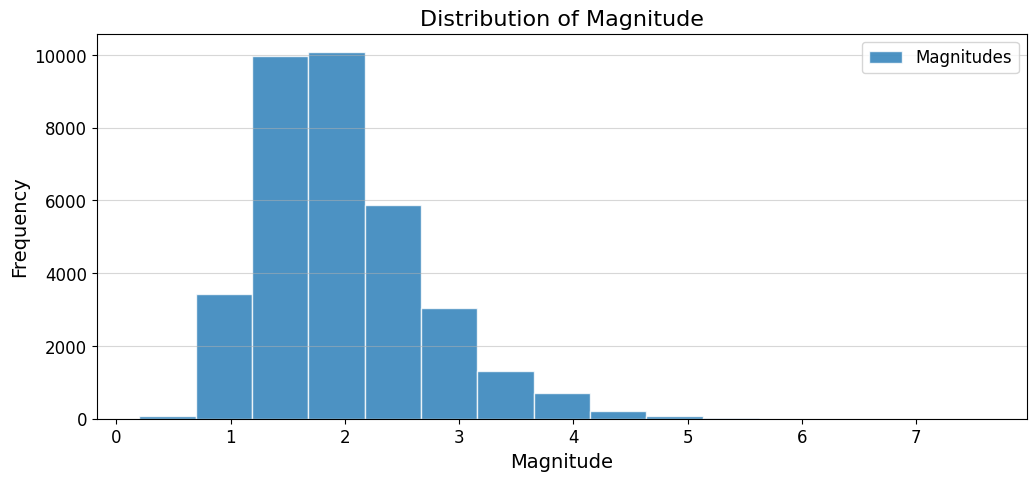

In [28]:
fig, ax = plt.subplots(figsize=(12, 5))

n, bins, patches = ax.hist(df['Magnitude'], bins=15, edgecolor='white', alpha=0.8, color='#1f77b4')
ax.set_xlabel('Magnitude', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_title('Distribution of Magnitude', fontsize=16)
ax.grid(axis='y', alpha=0.5)

for patch in patches:
    patch.set_linewidth(1)
    patch.set_edgecolor('white')
    
ax.legend(['Magnitudes'], fontsize=12)
plt.show()

<p>The <i>x-axis</i> of the plot represents the <i>magnitude</i> values, while the <i>y-axis</i> represents the <i>frequency</i> of occurrence of each <i>magnitude</i> value. The bars in the plot represent the <i>frequency of magnitude</i> values within each bin, which can be customized to control the number of bins and the width of each bin. By examining the shape and distribution of the <i>magnitude histogram plot</i>, we can gain insights into the characteristics of the data, such as the presence of outliers, the overall level of variability, and the central tendency of the magnitude values.</p>

<h4>Box Plot and Iterquartile Range</h4>

A box plot is a graphical representation of the distribution of data that displays the median, quartiles, and outliers. The box plot for the Magnitude column shows the following features:

<ul>
  <li>The box represents the interquartile range (IQR), which is the range of the middle 50% of the data.</li>
  <li>The bottom and top of the box indicate the 25th and 75th percentiles, respectively.</li>
  <li>The line inside the box represents the median, which is the middle value of the data.</li>
  <li>The whiskers extend from the box to the smallest and largest observations that are not outliers.</li>
  <li>Outliers are plotted as individual points outside the whiskers.</li>
  <li>The notch in the box represents the confidence interval of the median. If the notches of two box plots do not overlap, it suggests that there is a significant difference between the medians of the two groups.</li>
</ul>

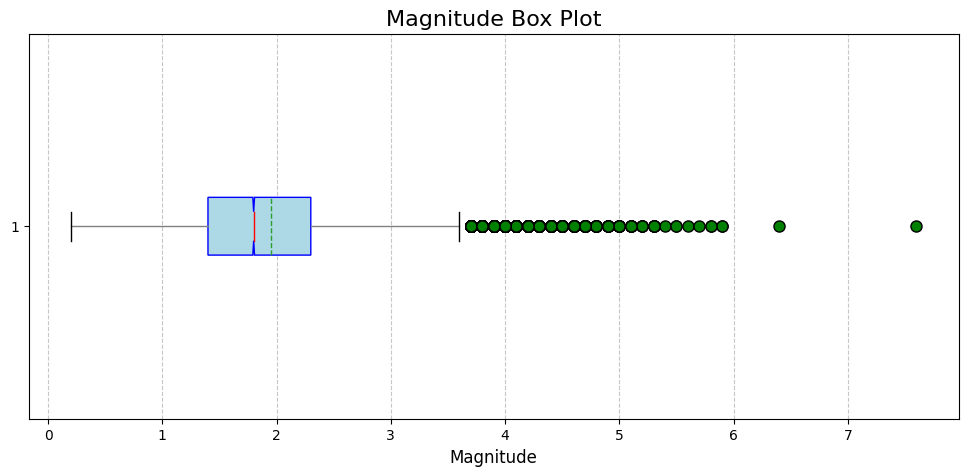

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.boxplot(df['Magnitude'], notch=True, vert=False, showmeans=True, meanline=True, 
            patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'), whiskerprops=dict(color='gray'),
            capprops=dict(color='black'), flierprops=dict(marker='o', markerfacecolor='green', markersize=8))

plt.title("Magnitude Box Plot", fontsize=16)
plt.xlabel("Magnitude", fontsize=12)
plt.ylabel("", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<p>For the beggining, let's calculate presence of outliers from <i>Magnitude</i> column. From the beggining, we should calculate the <i>Iterquartile Range (IQR)</i> of the <i>Magnitude</i> column.</p>

In [30]:
Q1 = df['Magnitude'].quantile(0.25)
Q3 = df['Magnitude'].quantile(0.75)
IQR = Q3 - Q1

<p>Now, we can identify potential outliers as values that are more than 1.5 times the <i>IQR</i> away from the <i>median</i>.</p>

In [31]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Magnitude'] < lower_bound) | (df['Magnitude'] > upper_bound)]

In [32]:
print("Number of potential outliers:", len(outliers))

print("Potential outlier values: ")
outliers['Magnitude'].head(10)

Number of potential outliers: 1026
Potential outlier values: 


8      3.7
97     5.0
124    3.9
143    4.3
242    4.1
382    4.0
437    4.0
502    3.7
527    3.8
772    3.8
Name: Magnitude, dtype: float64

<p>Overall, the box plot for the Magnitude column provides a visual summary of the central tendency, spread, and outliers of the data. It can be used to compare the Magnitude data to other datasets or to identify unusual values in the data.</p>

<h4>Standard Deviation, Mean and Median</h4>

<p>Let's calculate the overall level of variability from the Magnitude column using a measure called the <i>standard deviation</i>. The <i>standard deviation</i> measures how much the values in a dataset deviate from the mean value. A higher <i>standard deviation</i> indicates greater variability in the data.</p>

In [33]:
magnitude_std = df['Magnitude'].std()

In [34]:
print("The standard deviation of the Magnitude column is: ", magnitude_std)

The standard deviation of the Magnitude column is:  0.7186942905502297


<p>In addition, let's calculate the <i>central tendency</i> of the <i>Magnitude</i> column using measures like the <i>mean</i> and <i>median</i>. These measures can provide information about the typical or representative value of the <i>Magnitude</i> data.</p>

In [35]:
magnitude_mean = df['Magnitude'].mean()
magnitude_median = df['Magnitude'].median()

In [36]:
print("The mean of the Magnitude column is:", magnitude_mean)
print("The median of the Magnitude column is:", magnitude_median)

The mean of the Magnitude column is: 1.9496380974264704
The median of the Magnitude column is: 1.8


<br>
<h2 align=center id="dbscan">Clustering with DBSCAN and Visualization</h2>

<p><i>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</i> is a <i>clustering algorithm</i> used in <i>machine learning</i> and <i>data mining</i>. It is a <i>density-based clustering algorithm</i>, which means that it groups together data points that are close to each other in <i>space</i> and <i>density</i>, and separates them from other <i>regions</i> of <i>lower density</i>. The algorithm is particularly effective at identifying <i>clusters of arbitrary shape</i>, as well as clusters that contain <i>noise</i> or <i>outliers</i>.</p>

<p><i>The DBSCAN algorithm</i> is useful in many applications, including <i>image processing</i>, <i>natural language processing</i>, and <i>anomaly detection</i>. It is especially powerful in cases where the data has complex structure and traditional clustering algorithms like <i>K-means</i> may not work well. However, the performance of the algorithm can be sensitive to the choice of parameters, and it can be computationally expensive for large datasets.</p>

<p>The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.</p>

In [37]:
date = datetime.datetime.utcnow()

In [38]:
mpl.rcParams['figure.figsize'] = (20, 10)

<p>Through our data, we should define edges of the earthquakes.</p>

In [39]:
max_lat = df['Latitude'].max()
max_lat = max_lat + 1
min_lat = df['Latitude'].min()
min_lat = min_lat - 1

max_lon = df['Longitude'].max()
max_lon = max_lon + 1
min_lon = df['Longitude'].min()
min_lon = min_lon - 1

In [40]:
my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 100.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lon, urcrnrlat=max_lat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

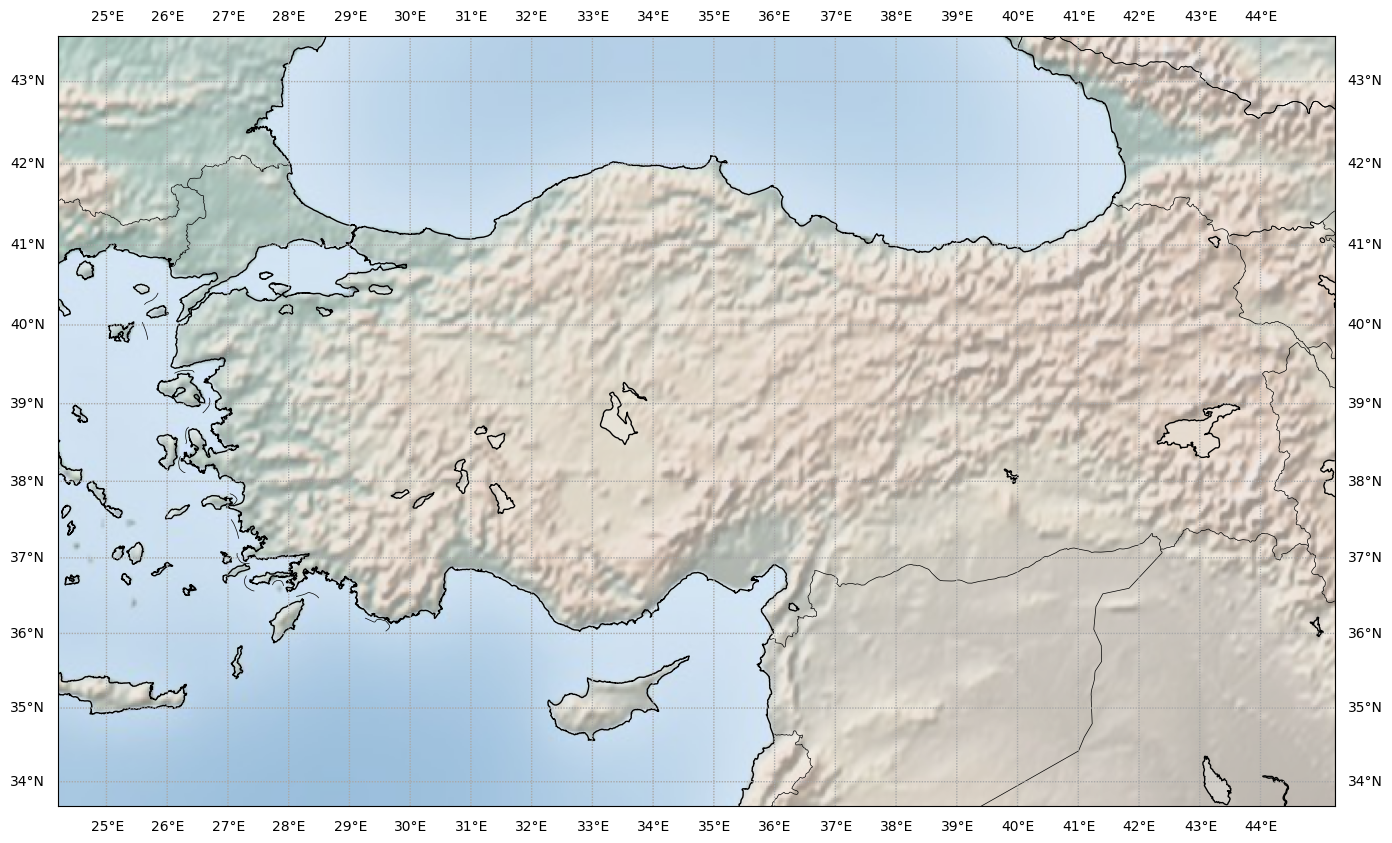

In [41]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
my_map.nightshade(date)
parallels = np.arange(round(min_lat), round(max_lat), 1)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(round(min_lon), round(max_lon), 1)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

xs, ys = my_map(np.asarray(df.Longitude), np.asarray(df.Latitude))
df['xm'] = xs.tolist()
df['ym'] =ys.tolist()

<p>The density of <i>earthquakes</i> based on location refers to the <i>distribution</i> of <i>earthquake</i> occurrences across a geographical area. In general, areas with a high density of earthquakes are considered to be more <i>seismically active</i> than areas with a <i>low density</i> of <i>earthquakes</i>.

<i>Earthquake density</i> can be represented using various graphical methods, such as <i>heat maps</i> or <i>contour maps</i>. These maps typically use color or shading to indicate the <i>frequency or intensity of earthquakes</i> in different parts of the region of interest. For example, areas with <i>high earthquake density</i> might be colored in red, while <i>areas with low density</i> might be colored in blue or green.

Understanding <i>earthquake density</i> is <b>important for assessing seismic risk and designing earthquake-resistant structures. It can also help scientists better understand the underlying causes of earthquakes and develop more accurate earthquake prediction models.</b></p>

In [42]:
lon = df['Longitude']
lat = df['Latitude']
mag = df['Magnitude']

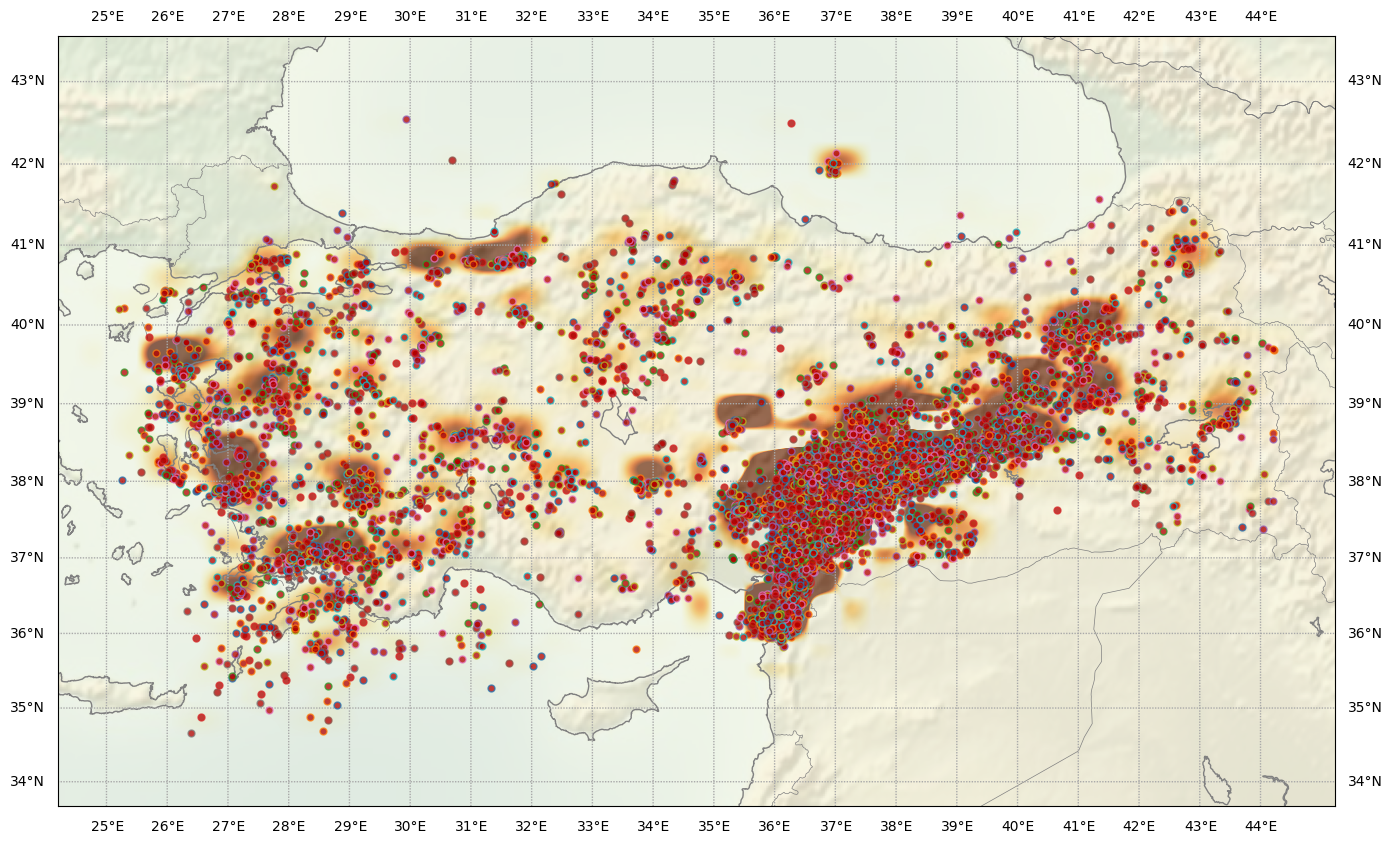

In [43]:
my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(round(min_lat), round(max_lat), 1)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(round(min_lon), round(max_lon), 1)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

nx, ny = 40, 40
lon_bins = np.linspace(min_lon, max_lon, nx+1)
lat_bins = np.linspace(min_lat, max_lat, ny+1)

density, _, _ = np.histogram2d(lon, lat, [lon_bins, lat_bins])

a = my_map.imshow(density.T, interpolation='spline36', alpha=0.7, cmap='YlOrBr', vmin=0, vmax=34)

for index, row in df.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([0.7, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

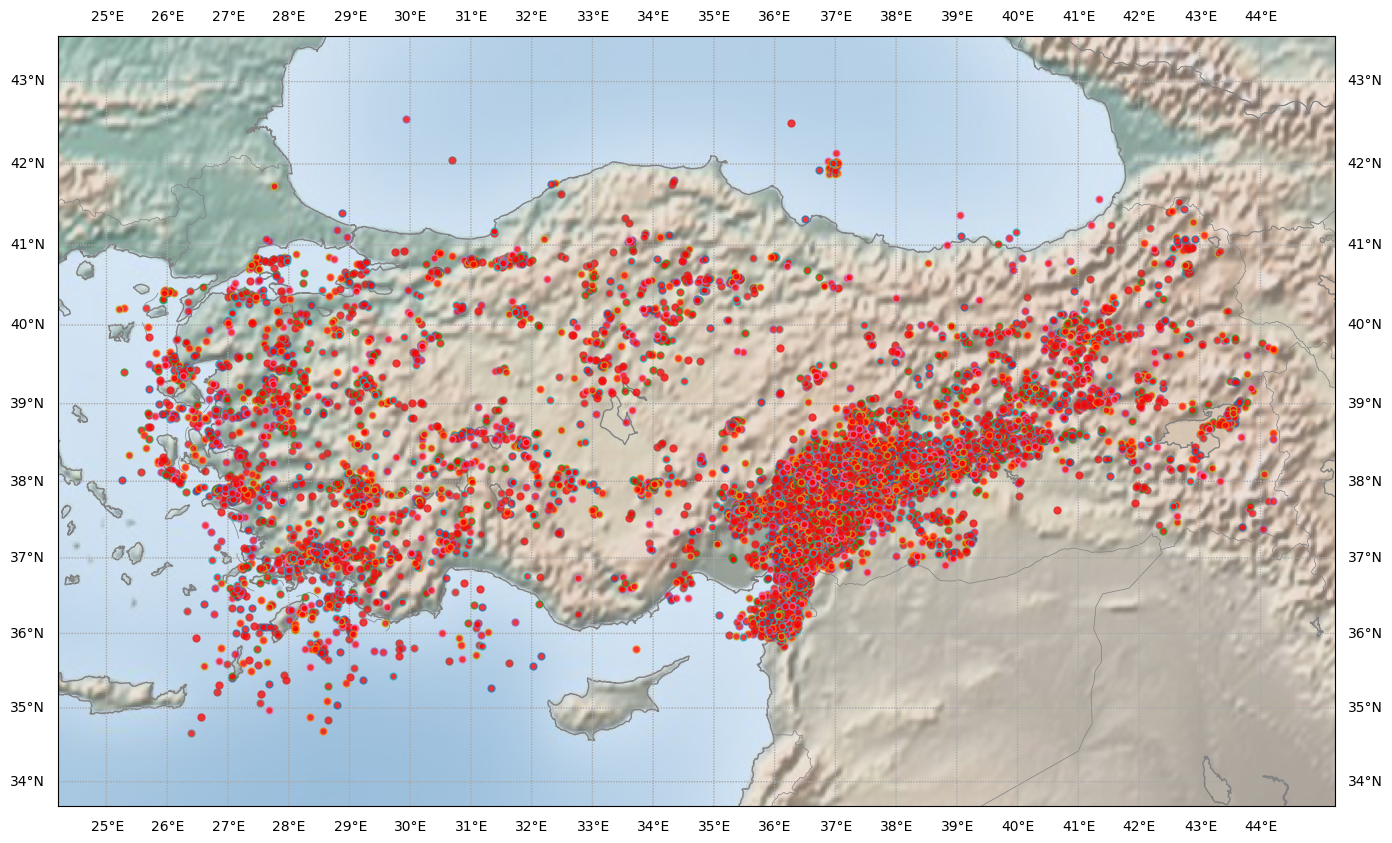

In [44]:
my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(round(min_lat), round(max_lat), 1)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(round(min_lon), round(max_lon), 1)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

for index, row in df.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([1, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

<h3>Clustering of Stations Based on Their Magnitude</h3>

<p><i>DBSCAN</i> form sklearn library can run <i>DBSCAN</i> clustering from vector array or distance matrix. In our case, we pass it the <i>NumPy</i> array <code>Clus_dataSet</code> to find core samples of <i>high density</i> and expands <i>clusters</i> from them.</p>

In [45]:
sklearn.utils.check_random_state(100)
Clus_dataSet = df[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

<p>Computing DBSCAN.</p>

In [46]:
df.head()

Longitude  Latitude  Depth   Rms Type  Magnitude  EventID      Dates  \
0     36.413    38.205   9.02  0.54   ML        2.2   579066 2023-04-27   
1     36.492    37.911   7.00  0.28   ML        1.7   579067 2023-04-27   
2     36.344    37.971   7.00  0.46   ML        1.7   579057 2023-04-27   
3     38.213    38.276   7.00  0.10   ML        1.6   579059 2023-04-27   
4     38.302    38.281   8.28  0.23   ML        1.3   579058 2023-04-27   

       Time        Town           City            xm             ym  
0  07:19:18      Göksun  Kahramanmaraş  1.358245e+06  623819.012474  
1  07:17:40      Göksun  Kahramanmaraş  1.367030e+06  582300.206815  
2  06:55:04      Göksun  Kahramanmaraş  1.350573e+06  590759.905378  
3  06:49:01   Yeşilyurt        Malatya  1.558396e+06  633870.757441  
4  06:47:10  Battalgazi        Malatya  1.568293e+06  634578.997032

<br>

<p><i>The DBSCAN algorithm</i> works by defining two parameters: <code>epsilon</code> (ε) and <code>min_samples</code>. <i>Epsilon</i> is a distance threshold that defines the maximum distance between two points for them to be considered part of the same cluster. <i>Min_samples</i> is the minimum number of points required to form a cluster. The algorithm then proceeds as follows:</p>

<ol>
  <li>Randomly select a point from the dataset that has not been visited.</li>
  <li>Find all the points within epsilon distance of this point, forming a "neighborhood".</li>
  <li>If the neighborhood contains fewer than min_samples points, label the point as noise.</li>
  <li>Otherwise, label the point and all points in the neighborhood as being part of the same cluster.</li>
  <li>Repeat steps 1-4 until all points have been visited.</li>
<ol>

In [47]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

In [48]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [50]:
df[["Magnitude", "Clus_Db"]].head()

Magnitude  Clus_Db
0        2.2        0
1        1.7        0
2        1.7        0
3        1.6        0
4        1.3        0

In [51]:
set(labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55}

<h4>Visualization of Clusters Based on Location</h4>

<ipython-input-52-d4fdc8c6e387>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Magnitude: 1.989339774557166
Cluster 1, Avg Magnitude: 1.3259887005649718
Cluster 2, Avg Magnitude: 1.7583333333333335
Cluster 3, Avg Magnitude: 1.467671691792295
Cluster 4, Avg Magnitude: 1.7615384615384617
Cluster 5, Avg Magnitude: 1.621818181818182
Cluster 6, Avg Magnitude: 1.4972067039106145
Cluster 7, Avg Magnitude: 1.225
Cluster 8, Avg Magnitude: 1.2727272727272727
Cluster 9, Avg Magnitude: 2.0966101694915253
Cluster 10, Avg Magnitude: 1.692361111111111
Cluster 11, Avg Magnitude: 1.6272413793103448
Cluster 12, Avg Magnitude: 1.5142857142857142
Cluster 13, Avg Magnitude: 1.5272727272727273
Cluster 14, Avg Magnitude: 1.8827586206896552
Cluster 15, Avg Magnitude: 1.7636363636363637
Cluster 16, Avg Magnitude: 1.4
Cluster 17, Avg Magnitude: 1.7098159509202457
Cluster 18, Avg Magnitude: 1.781818181818182
Cluster 19, Avg Magnitude: 1.61
Cluster 20, Avg Magnitude: 1.3032258064516131
Cluster 21, Avg Magnitude: 1.7521739130434781
Cluster 22, Avg Magnitude: 1.2034482758620688

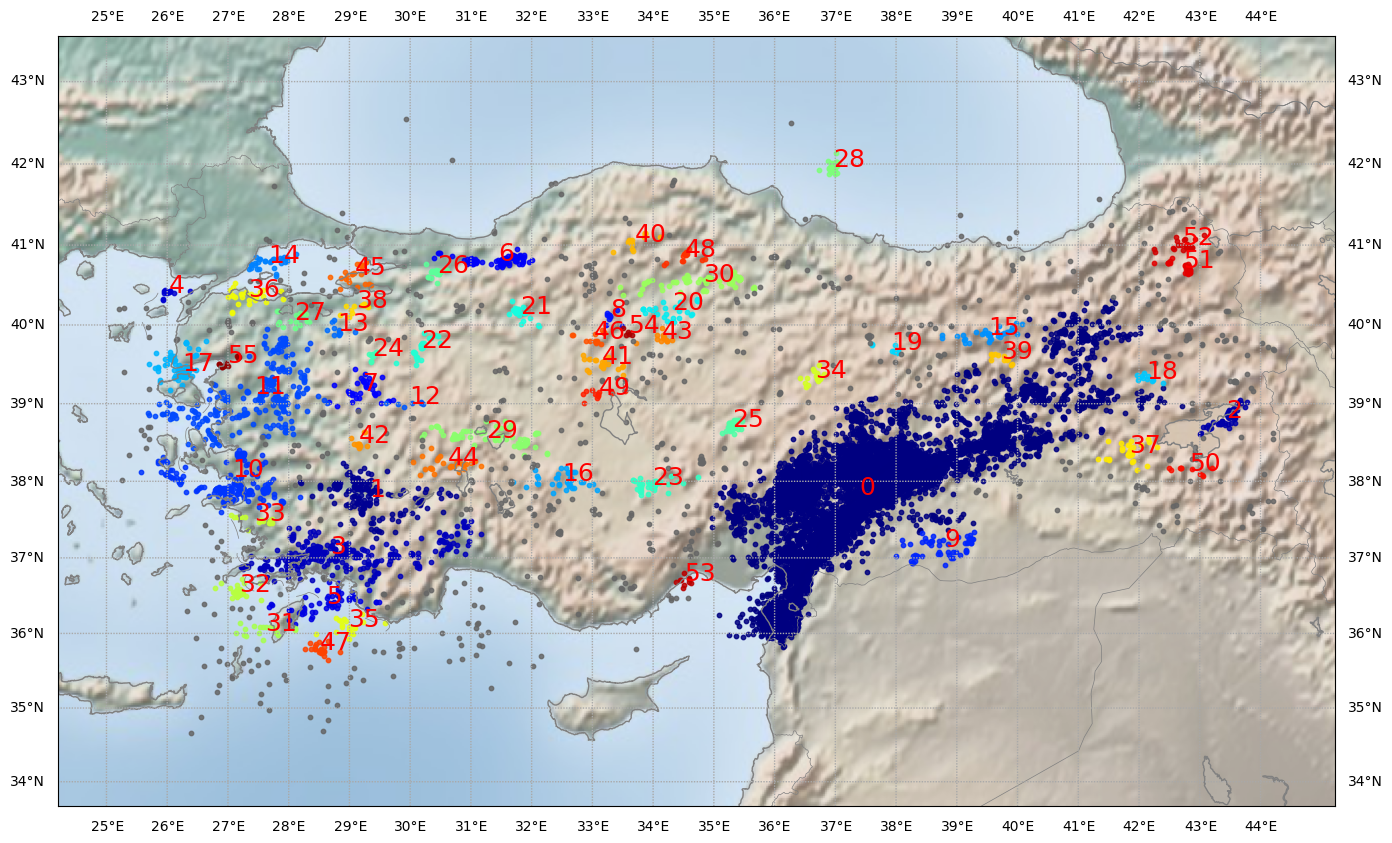

In [52]:
my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(round(min_lat), round(max_lat), 1)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(round(min_lon), round(max_lon), 1)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

<p>In addition, we can save our modified CSV file. <code>to_csv()</code> function is used to save the DataFrame to a CSV file. The first argument is the filename you want to use for the output file</p>

In [53]:
df.to_csv('modified_data.csv', index=False, encoding='utf-8-sig')

<br>

<h2>Contact Me</h2>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [54]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-04-27 09:46:40
